# 돼지열병과 조류 인플루엔자 발생일자 전처리

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns

In [278]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [279]:
# 결측치 없음
asf_df = pd.read_csv('./data/ASF.csv')
hpai_df = pd.read_csv('./data/HPAI.csv')
print(asf_df.info(), hpai_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   발생차수                52 non-null     int64 
 1   가축전염병명              52 non-null     object
 2   농장 소재지              52 non-null     object
 3   축산계열화사업자명           52 non-null     object
 4   가축전염병 발생일           52 non-null     object
 5   사육규모                52 non-null     object
 6   가축전염병 예방확산방지를위한 정보  52 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   발생차수                  264 non-null    int64 
 1   가축전염병명                264 non-null    object
 2   농장 소재지                264 non-null    object
 3   축산계열화사업자명             264 non-null    object
 4   가축전염병 발

In [280]:
# 중복값 확인 -> 없음
asf_df.duplicated().sum()
hpai_df.duplicated().sum()

np.int64(0)

In [281]:
# 컬럼 이름 확인
print(asf_df.columns.tolist())

['발생차수', '가축전염병명 ', '농장 소재지 ', '축산계열화사업자명', '가축전염병 발생일', '사육규모', '가축전염병 예방확산방지를위한 정보']


In [282]:
# 데이터 가공 (필요없는 컬럼 삭제)
asf_df.drop(['발생차수', '축산계열화사업자명', '가축전염병 예방확산방지를위한 정보', '사육규모'], axis=1, inplace=True)
hpai_df.drop(['축산계열화사업자명', '가축전염병 예방확산 방지를 위한 정보', '사육규모', '발생차수'], axis=1, inplace=True)
display(asf_df, hpai_df)

,가축전염병명,농장 소재지,가축전염병 발생일
0,아프리카돼지열병(ASF),경기 파주 연다산동,‘19.9.16
1,아프리카돼지열병(ASF),경기 연천 백학면 전동리,‘19.9.17
2,아프리카돼지열병(ASF),경기 김포 통진면 가현리,‘19.9.23
3,아프리카돼지열병(ASF),경기 파주 적성면 자장리,‘19.9.23
4,아프리카돼지열병(ASF),인천 강화 송해면 신당리,‘19.9.23
5,아프리카돼지열병(ASF),인천 강화 불은면 고능리,‘19.9.25
6,아프리카돼지열병(ASF),인천 강화 삼산면 석포리,‘19.9.25
7,아프리카돼지열병(ASF),인천 강화 강화면 월곶리,‘19.9.26
8,아프리카돼지열병(ASF),인천 강화 하점면 신삼리,‘19.9.26
9,아프리카돼지열병(ASF),경기 파주 파평면 마산리,‘19.10.1


,가축전염병명,농장 소재지,가축전염병 발생일,가축의 종류
0,고병원성조류인플루엔자(HPAI),전북 정읍 소성면 기린리,20.11.26,육용오리
1,고병원성조류인플루엔자(HPAI),경북 상주 공성면 무곡리,20.12.1,산란계
2,고병원성조류인플루엔자(HPAI),전남 영암 시종면 신학리,20.12.4,육용오리
3,고병원성조류인플루엔자(HPAI),경기 여주 가남읍 은봉리,20.12.6,산란계
4,고병원성조류인플루엔자(HPAI),충북 음성 금왕읍 신평리,20.12.7,메추리
5,고병원성조류인플루엔자(HPAI),전남 나주 세지면 세영로,20.12.7,육용오리
6,고병원성조류인플루엔자(HPAI),경기 여주 가남읍 산군리,20.12.8,메추리
7,고병원성조류인플루엔자(HPAI),전남 나주 동강면 장동리,20.12.9,육용오리
8,고병원성조류인플루엔자(HPAI),전남 장성 삼계면 상도리,20.12.10,종오리
9,고병원성조류인플루엔자(HPAI),전북 정읍 정우면 대사리,20.12.10,육용오리


##### 날짜 변환 (YYYY-MM-DD 형식으로)

In [283]:
import re

def fix_date(x):
    if pd.isna(x):
        return None
    x = str(x)
    
    # 1. 이상한 따옴표, 공백, 점(.) 정리
    x = x.replace('‘', '').replace('’', '').replace("'", "").strip()
    x = re.sub(r'\s+', '', x)        # 공백 모두 제거
    x = re.sub(r'\.+$', '', x)       # 끝에 오는 점 제거

    # 2. 연도가 2자리면 20xx로 보정
    parts = x.split('.')
    if len(parts) == 3:
        y, m, d = parts
        if len(y) == 2:
            y = '20' + y
        try:
            return pd.to_datetime(f"{y}-{int(m):02}-{int(d):02}", errors='coerce')
        except:
            return None
    else:
        return None

asf_df['가축전염병 발생일'] = asf_df['가축전염병 발생일'].apply(fix_date)
print(asf_df)

          가축전염병명             농장 소재지   가축전염병 발생일
0   아프리카돼지열병(ASF)        경기 파주 연다산동  2019-09-16
1   아프리카돼지열병(ASF)      경기 연천 백학면 전동리 2019-09-17
2   아프리카돼지열병(ASF)     경기 김포 통진면 가현리  2019-09-23
3   아프리카돼지열병(ASF)      경기 파주 적성면 자장리 2019-09-23
4   아프리카돼지열병(ASF)     인천 강화 송해면 신당리  2019-09-23
5   아프리카돼지열병(ASF)     인천 강화 불은면 고능리  2019-09-25
6   아프리카돼지열병(ASF)      인천 강화 삼산면 석포리 2019-09-25
7   아프리카돼지열병(ASF)      인천 강화 강화면 월곶리 2019-09-26
8   아프리카돼지열병(ASF)      인천 강화 하점면 신삼리 2019-09-26
9   아프리카돼지열병(ASF)      경기 파주 파평면 마산리 2019-10-01
10  아프리카돼지열병(ASF)      경기 파주 적성면 주월리 2019-10-01
11  아프리카돼지열병(ASF)      경기 파주 문산면 마정리 2019-10-02
12  아프리카돼지열병(ASF)      경기 김포 통진면 고척리 2019-10-02
13  아프리카돼지열병(ASF)      경기 연천 신서면 답곡리 2019-10-09
14  아프리카돼지열병(ASF)      강원 화천 상서면 다목리 2020-10-08
15  아프리카돼지열병(ASF)      강원 화천 상서면 봉오리 2020-10-09
16  아프리카돼지열병(ASF)      강원 영월 주천면 용석리 2021-05-04
17  아프리카돼지열병(ASF)    강원도 고성군 간성읍 해상리 2021-08-07
18  아프리카돼지열병(ASF)   강원도 인제군 인제읍 가리산리 2021-08-15
19  아프리카돼지열병(ASF)    강원도 홍천군 내촌면 물걸리 202

In [284]:
import re

def fix_date(x):
    if pd.isna(x):
        return None
    x = str(x)
    
    # 1. 이상한 따옴표, 공백, 점(.) 정리
    x = x.replace('‘', '').replace('’', '').replace("'", "").strip()
    x = re.sub(r'\s+', '', x)        # 공백 모두 제거
    x = re.sub(r'\.+$', '', x)       # 끝에 오는 점 제거

    # 2. 연도가 2자리면 20xx로 보정
    parts = x.split('.')
    if len(parts) == 3:
        y, m, d = parts
        if len(y) == 2:
            y = '20' + y
        try:
            return pd.to_datetime(f"{y}-{int(m):02}-{int(d):02}", errors='coerce')
        except:
            return None
    else:
        return None

hpai_df['가축전염병 발생일'] = hpai_df['가축전염병 발생일'].apply(fix_date)
print(hpai_df)

               가축전염병명                농장 소재지   가축전염병 발생일  \
0    고병원성조류인플루엔자(HPAI)         전북 정읍 소성면 기린리 2020-11-26   
1    고병원성조류인플루엔자(HPAI)         경북 상주 공성면 무곡리 2020-12-01   
2    고병원성조류인플루엔자(HPAI)         전남 영암 시종면 신학리 2020-12-04   
3    고병원성조류인플루엔자(HPAI)         경기 여주 가남읍 은봉리 2020-12-06   
4    고병원성조류인플루엔자(HPAI)         충북 음성 금왕읍 신평리 2020-12-07   
5    고병원성조류인플루엔자(HPAI)         전남 나주 세지면 세영로 2020-12-07   
6    고병원성조류인플루엔자(HPAI)         경기 여주 가남읍 산군리 2020-12-08   
7    고병원성조류인플루엔자(HPAI)         전남 나주 동강면 장동리 2020-12-09   
8    고병원성조류인플루엔자(HPAI)         전남 장성 삼계면 상도리 2020-12-10   
9    고병원성조류인플루엔자(HPAI)         전북 정읍 정우면 대사리 2020-12-10   
10   고병원성조류인플루엔자(HPAI)         전남 영암 덕진면 용산리 2020-12-11   
11   고병원성조류인플루엔자(HPAI)         전남 영암 덕진면 용산리 2020-12-11   
12   고병원성조류인플루엔자(HPAI)         경기 김포 통진읍 가현리 2020-12-12   
13   고병원성조류인플루엔자(HPAI)         전북 임실 오수면 대정리 2020-12-14   
14   고병원성조류인플루엔자(HPAI)     충남 천안 서북구 성환읍 대홍리 2020-12-14   
15   고병원성조류인플루엔자(HPAI)         경북 구미 선산읍 죽장리 2020-12-14 

In [285]:
# '농장 소재지'에서 지역명(첫 단어)만 추출
hpai_df['지역'] = hpai_df['농장 소재지 '].str.split().str[0]
지역 = hpai_df['지역'].unique()
asf_df['지역'] = asf_df['농장 소재지 '].str.split().str[0]
지역 = asf_df['지역'].unique()
asf_df

,가축전염병명,농장 소재지,가축전염병 발생일,지역
0,아프리카돼지열병(ASF),경기 파주 연다산동,2019-09-16,경기
1,아프리카돼지열병(ASF),경기 연천 백학면 전동리,2019-09-17,경기
2,아프리카돼지열병(ASF),경기 김포 통진면 가현리,2019-09-23,경기
3,아프리카돼지열병(ASF),경기 파주 적성면 자장리,2019-09-23,경기
4,아프리카돼지열병(ASF),인천 강화 송해면 신당리,2019-09-23,인천
5,아프리카돼지열병(ASF),인천 강화 불은면 고능리,2019-09-25,인천
6,아프리카돼지열병(ASF),인천 강화 삼산면 석포리,2019-09-25,인천
7,아프리카돼지열병(ASF),인천 강화 강화면 월곶리,2019-09-26,인천
8,아프리카돼지열병(ASF),인천 강화 하점면 신삼리,2019-09-26,인천
9,아프리카돼지열병(ASF),경기 파주 파평면 마산리,2019-10-01,경기


---

# 데이터 전처리

In [286]:
# 돼지열병 지역별
asf_df.drop(['가축전염병명 ', '농장 소재지 '], axis=1, inplace=True)
asf_df['가축전염병 발생일'] = pd.to_datetime(asf_df['가축전염병 발생일'])
asf_df['발생연월'] = asf_df['가축전염병 발생일'].dt.to_period('M').astype(str)
asf_df_unique = asf_df.drop_duplicates(subset=['발생연월', '지역'])
asf_df_unique.drop('가축전염병 발생일', axis=1, inplace=True)
asf_df_unique.reset_index(drop=True, inplace=True)
asf_df_unique

C:\Users\user\AppData\Local\Temp\ipykernel_21192\2349880898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asf_df_unique.drop('가축전염병 발생일', axis=1, inplace=True)


,지역,발생연월
0,경기,2019-09
1,인천,2019-09
2,경기,2019-10
3,강원,2020-10
4,강원,2021-05
5,강원도,2021-08
6,강원도,2021-10
7,강원도,2022-05
8,강원도,2022-08
9,강원도,2022-09


In [287]:
# 조류 인플루엔자 지역별
hpai_df.drop(['가축전염병명 ', '농장 소재지 '], axis=1, inplace=True)
hpai_df['가축전염병 발생일'] = pd.to_datetime(hpai_df['가축전염병 발생일'])
hpai_df['발생연월'] = hpai_df['가축전염병 발생일'].dt.to_period('M').astype(str)
hapi_df_unique = hpai_df.drop_duplicates(subset=['발생연월', '지역'])
hapi_df_unique.drop(['가축전염병 발생일', '가축의 종류'], axis=1, inplace=True)
hapi_df_unique.reset_index(drop=True, inplace=True)
pd.set_option('display.max_rows', None)       # 모든 행 표시
pd.set_option('display.max_columns', None)    # 모든 열 표시
pd.set_option('display.max_colwidth', None)   # 열 내용 잘리지 않게 표시 (긴 문자열)
pd.set_option('display.width', None)          # 화면 너비 제한 없이 표시 (매우 넓은 DataFrame용)

print(hapi_df_unique)

         지역     발생연월
0        전북  2020-11
1        경북  2020-12
2        전남  2020-12
3        경기  2020-12
4        충북  2020-12
5        전북  2020-12
6        충남  2020-12
7        전남  2021-01
8        충남  2021-01
9        세종  2021-01
10       전북  2021-01
11       충북  2021-01
12       경기  2021-01
13       경남  2021-01
14       경북  2021-01
15       경기  2021-02
16       충북  2021-02
17       전남  2021-02
18       전북  2021-02
19       제주  2021-02
20       경북  2021-02
21       경남  2021-02
22       강원  2021-02
23       전남  2021-03
24       충북  2021-03
25       전남  2021-04
26       경북  2022-10
27       충북  2022-10
28       충북  2022-11
29       전북  2022-11
30       충남  2022-11
31      강원도  2022-11
32       경기  2022-11
33       전남  2022-11
34       울산  2022-11
35       전남  2022-12
36       전북  2022-12
37       라남  2022-12
38     전라남도  2022-12
39     경상남도  2022-12
40      경기도  2022-12
41    부산광역시  2022-12
42     경상북도  2022-12
43     전라북도  2022-12
44     충청남도  2022-12
45     경상남도  2023-01
46      경기도  

C:\Users\user\AppData\Local\Temp\ipykernel_21192\2737108329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hapi_df_unique.drop(['가축전염병 발생일', '가축의 종류'], axis=1, inplace=True)


In [288]:
dfs = pd.read_csv('./data/2019.csv')

dfs['고기'] = dfs['고기'].replace({'소 1': '소', '소 1 ++': '소'})
dfs = dfs.loc[:, ~dfs.columns.str.contains('^Unnamed')]

dff = dfs.melt(id_vars=['고기', '연도'], var_name='월', value_name='가격')

dff['가격'] = dff.groupby(['고기', '연도', '월'])['가격'].transform(lambda x: x.fillna(x.mean()))
dff = dff.groupby(['고기', '연도', '월'])['가격'].mean().reset_index()

month = {'1월': '01', '2월': '02', '3월': '03', '4월': '04', '5월': '05', '6월': '06','7월': '07', '8월': '08', '9월': '09', '10월': '10', '11월': '11', '12월': '12'}
dff['월'] = dff['월'].map(month)
dff['yyyydd'] = pd.to_datetime(dff['연도'].astype(str) + '-' + dff['월'], format='%Y-%m')
dff['날짜'] = dff['yyyydd'].dt.to_period('M').astype(str)
dff = dff.sort_values(by='날짜')

dff[dff['고기'] == '소']

dff['가격'] = dff.groupby(['고기', '날짜'])['가격'].transform(lambda x: x.fillna(x.mean()))
display(dff)

,고기,연도,월,가격,yyyydd,날짜
3,닭,2019,01,5725.0,2019-01-01,2019-01
87,돼지,2019,01,1723.0,2019-01-01,2019-01
171,소,2019,01,10646.0,2019-01-01,2019-01
88,돼지,2019,02,1684.0,2019-02-01,2019-02
4,닭,2019,02,5692.0,2019-02-01,2019-02
172,소,2019,02,10494.0,2019-02-01,2019-02
5,닭,2019,03,5371.0,2019-03-01,2019-03
173,소,2019,03,10648.0,2019-03-01,2019-03
89,돼지,2019,03,1690.0,2019-03-01,2019-03
90,돼지,2019,04,1875.0,2019-04-01,2019-04


---

## 데이터 상관관계 시각화

##### 2019-2025 돼지열병

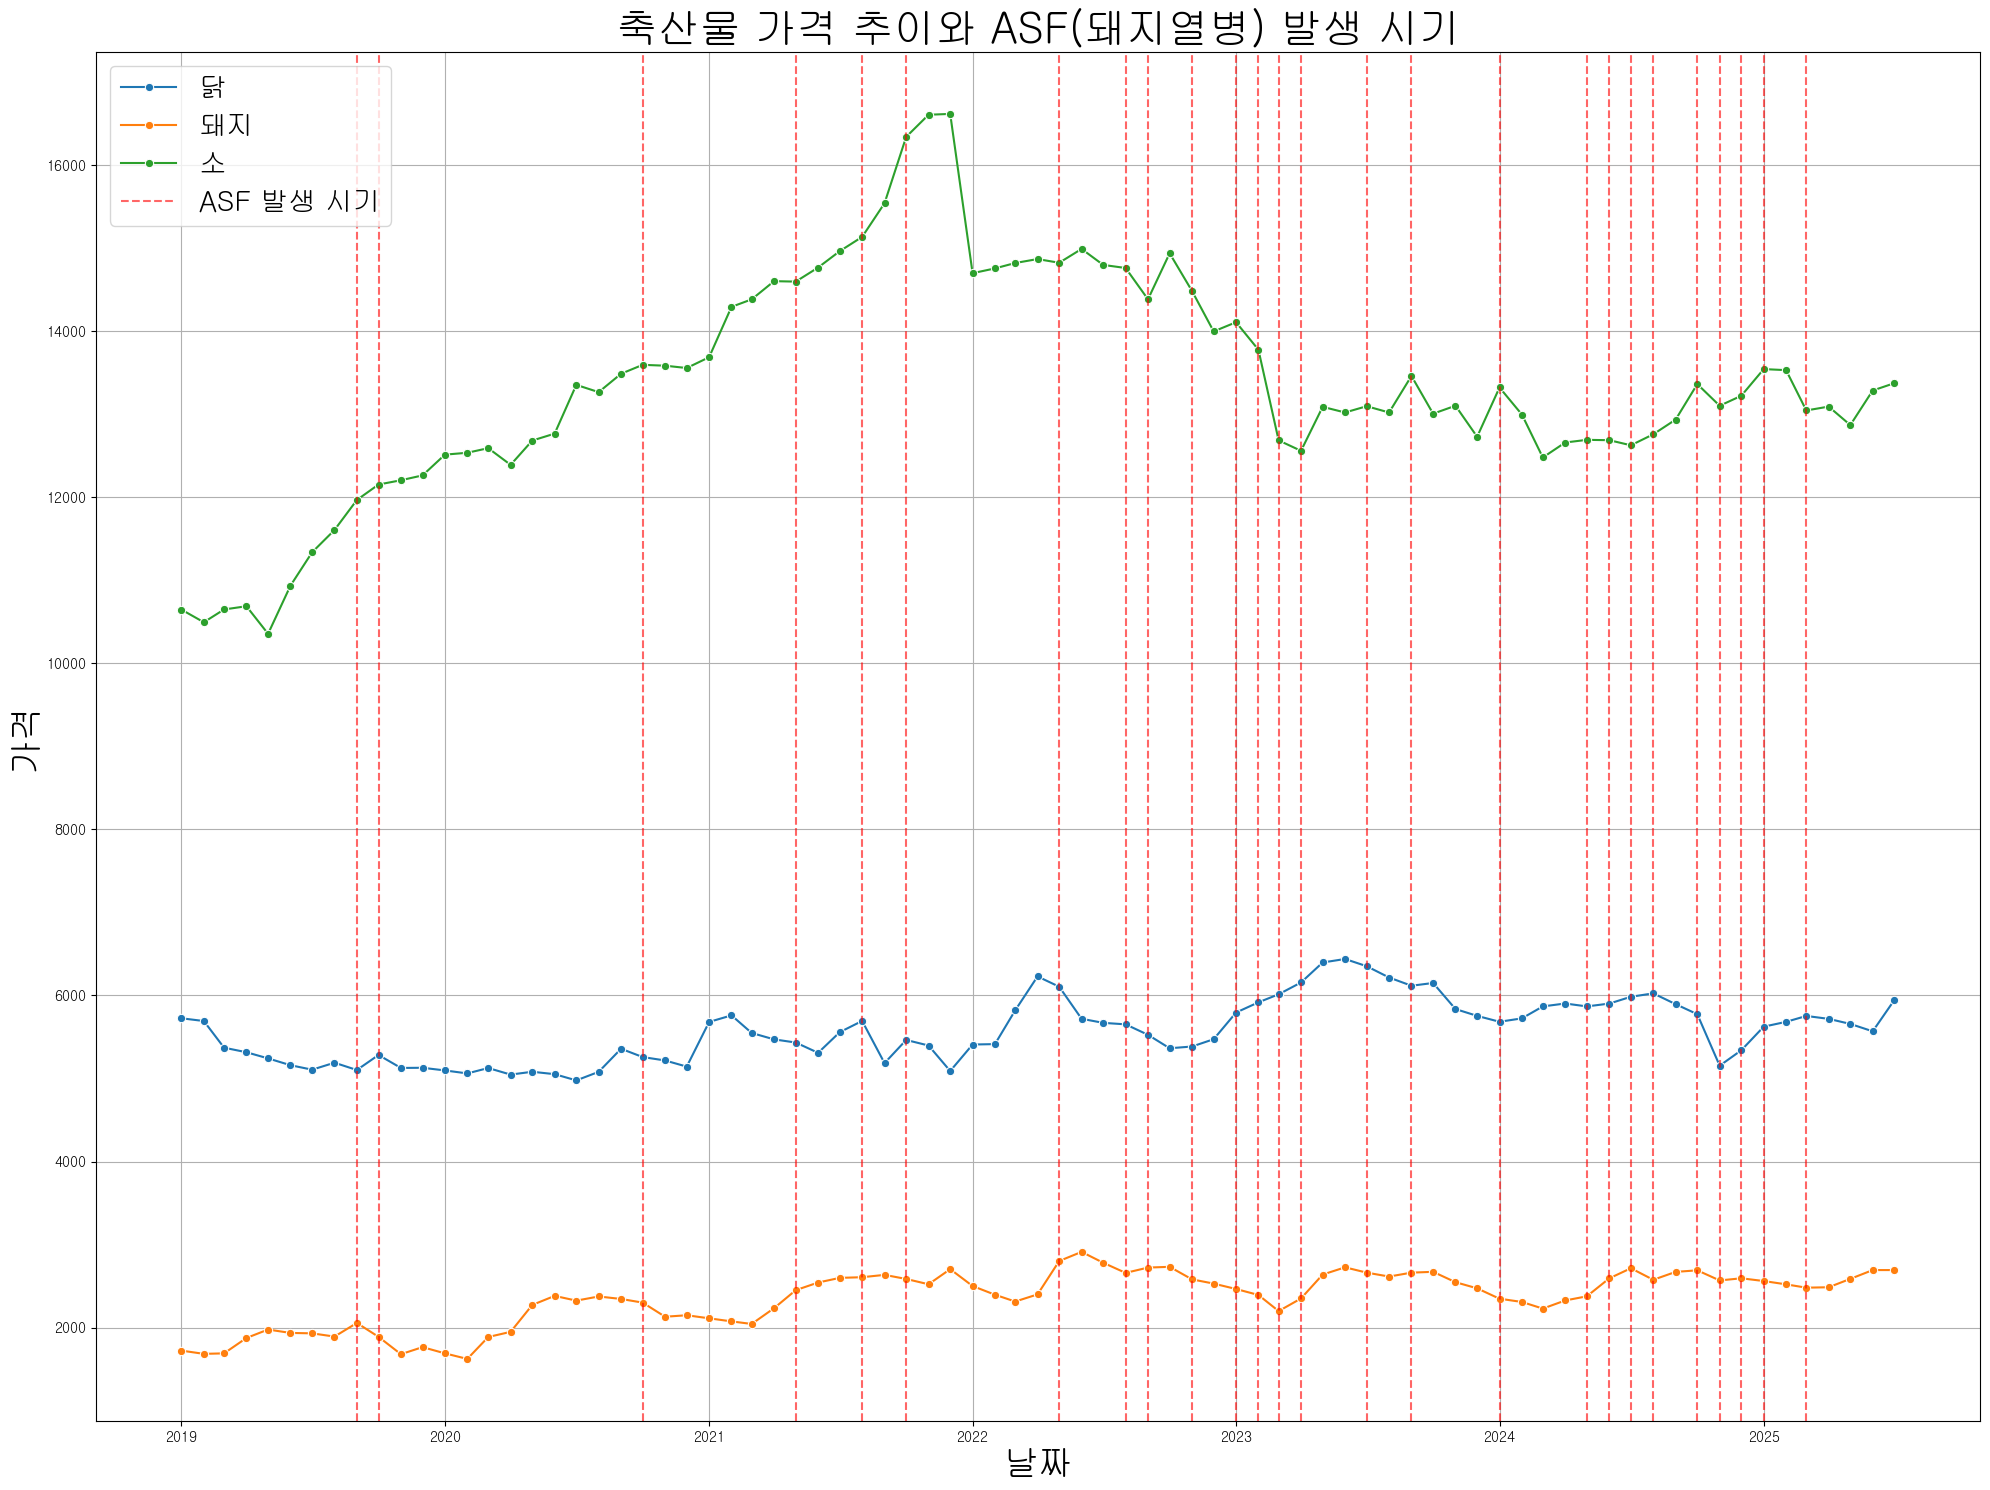

In [289]:
# 날짜 컬럼을 datetime으로
dff['yyyydd'] = pd.to_datetime(dff['yyyydd'])
# ASF 발생일 컬럼을 datetime으로
asf_df['가축전염병 발생일'] = pd.to_datetime(asf_df['가축전염병 발생일'])

# 월 단위로 정리 (중복 제거)
asf_months = asf_df['가축전염병 발생일'].dt.to_period('M').astype(str).drop_duplicates()

# 돼지 데이터만 추출
#pigs = dff[dff['고기'] == '돼지'].copy()
#pigs.sort_values('yyyydd', inplace=True)

plt.figure(figsize=(20, 15))
sns.lineplot(data=dff, x='yyyydd', y='가격', hue='고기', marker='o')

# ASF 발생 시기 세로선 표시
for month in asf_months:
    date = pd.to_datetime(month)
    plt.axvline(date, color='red', linestyle='--', alpha=0.6, label='ASF 발생 시기')

# 중복된 legend 제거
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=20)

plt.title('축산물 가격 추이와 ASF(돼지열병) 발생 시기', fontsize=30)
plt.xlabel('날짜', fontsize=25)
plt.ylabel('가격', fontsize=25)
plt.grid(True)
plt.tight_layout()
plt.show()


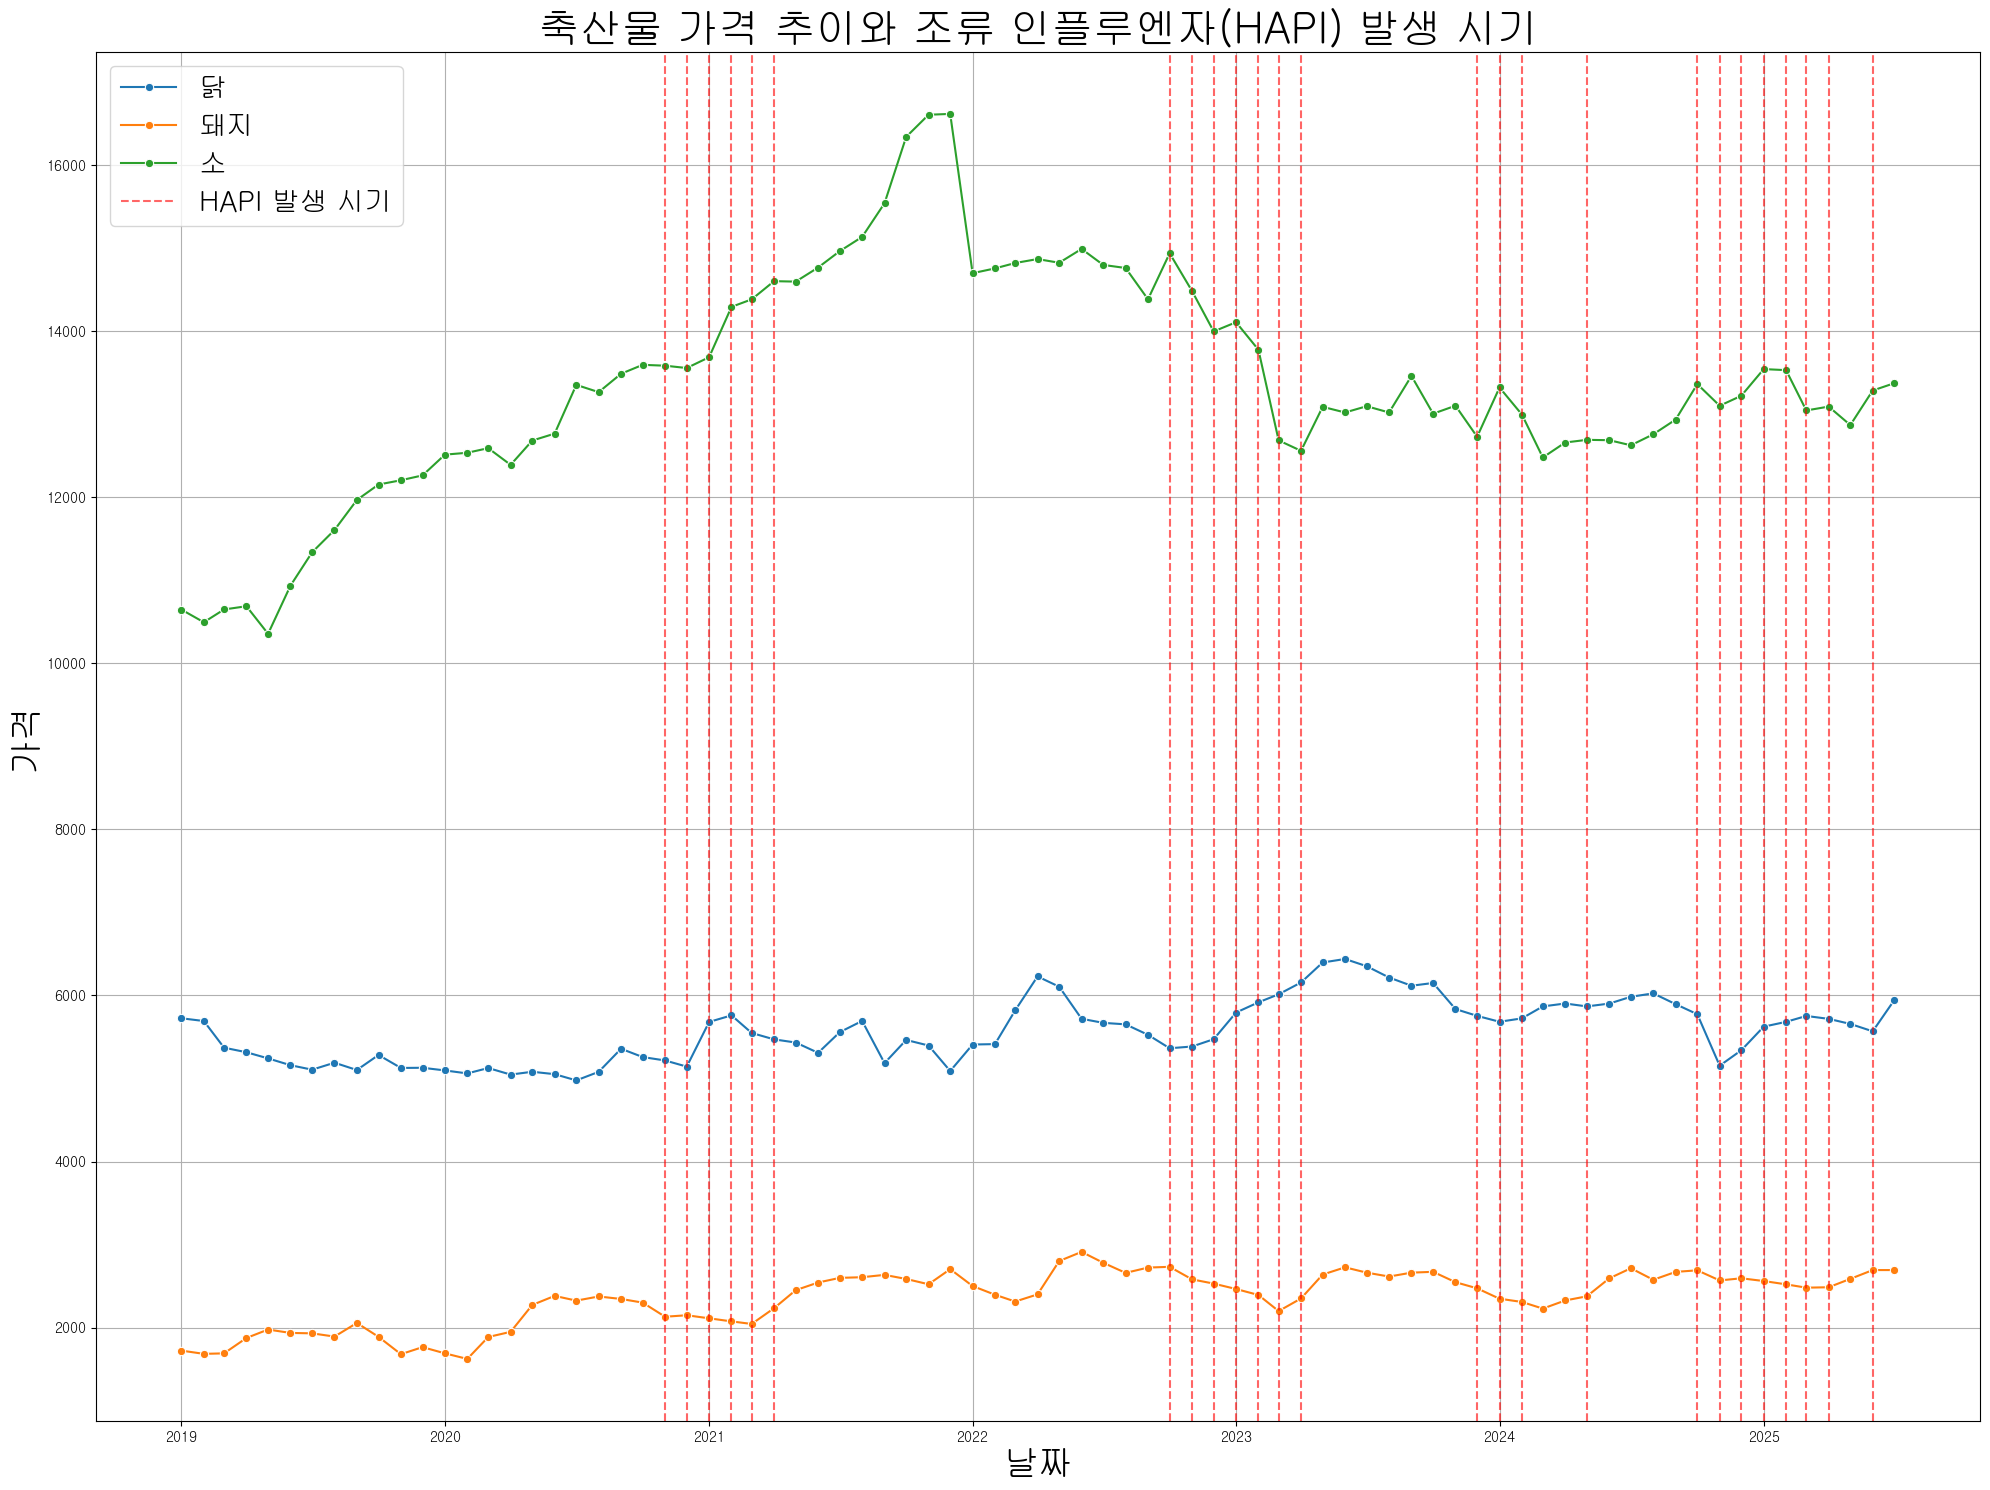

In [290]:
# 날짜 컬럼을 datetime으로
dff['yyyydd'] = pd.to_datetime(dff['yyyydd'])
# ASF 발생일 컬럼을 datetime으로
hpai_df['가축전염병 발생일'] = pd.to_datetime(hpai_df['가축전염병 발생일'])

# 월 단위로 정리 (중복 제거)
asf_months = hpai_df['가축전염병 발생일'].dt.to_period('M').astype(str).drop_duplicates()

# 돼지 데이터만 추출
#pigs = dff[dff['고기'] == '돼지'].copy()
#pigs.sort_values('yyyydd', inplace=True)

plt.figure(figsize=(20, 15))
sns.lineplot(data=dff, x='yyyydd', y='가격', hue='고기', marker='o')

# ASF 발생 시기 세로선 표시
for month in asf_months:
    date = pd.to_datetime(month)
    plt.axvline(date, color='red', linestyle='--', alpha=0.6, label='HAPI 발생 시기')

# 중복된 legend 제거
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=20)

plt.title('축산물 가격 추이와 조류 인플루엔자(HAPI) 발생 시기', fontsize=30)
plt.xlabel('날짜', fontsize=25)
plt.ylabel('가격', fontsize=25)
plt.grid(True)
plt.tight_layout()
plt.show()
